X_train 크기 : (426, 9)
y_train 크기 : (426,)
X_test 크기 : (143, 9)
y_test 크기 : (143,)
테스트 세츠 예측 :  [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0
 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
테스트 세트 정확도 : 0.90


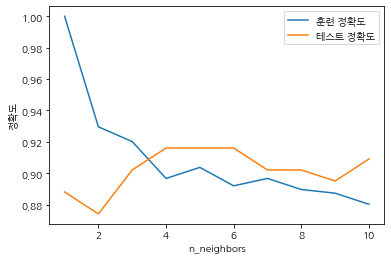

In [2]:
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import mglearn
import seaborn
plt.rc('font', family='NanumGothic') # For Windows
#암 데이터 csv 파일 읽어오기 .. 데이터프레임 형식
cancer_dataset = pd.read_csv('wdbc_mean.csv')

X, y = cancer_dataset.iloc[:,1:], cancer_dataset.iloc[:,0]

#데이터 셋을 훈련 셋과 테스트 셋으로 분리시킨다.
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset.iloc[:,1:],cancer_dataset.iloc[:,0],random_state=0)

print("X_train 크기 : {}".format(X_train.shape))
print("y_train 크기 : {}".format(y_train.shape))

print("X_test 크기 : {}".format(X_test.shape))
print("y_test 크기 : {}".format(y_test.shape))

#데이터 확인 그래프 그리기
# test_cancer_dataset = pd.DataFrame(X_train, columns=cancer_dataset.iloc[:,1:].columns)
# 
# pd.plotting.scatter_matrix(test_cancer_dataset, c = y_train, figsize=(15,15), marker='o')

#이웃알고리즘 갯수를 적는다.
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

print("테스트 세츠 예측 : ",knn.predict(X_test))
print("테스트 세트 정확도 : {:.2f}".format(knn.score(X_test,y_test)))

# fig,axes = plt.subplots(1,3, figsize=(10,3))

# for n_neigbors, ax in zip([1,3,7,9,11], axes):
#     #fit 메소드는 self 오브젝트 리턴 
#     knn = KNeighborsClassifier(n_neighbors=n_neigbors).fit(X,y)
#     mglearn.plots.plot_2d_separator(knn,X, fill= True, eps=0.5, ax=ax, alpha=4)
#     mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
#     ax.set_title("{} 이웃".format(n_neigbors))
#     ax.set_xlabel("특성 0")
#     ax.set_ylabel("특성 1")
# 
# axes[0].legend(loc=3)

neighbors_settings = range(1,11)
train_accuracy = []
test_accuracy = []

for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    
    #훈련 세트 정확도 저장
    train_accuracy.append(clf.score(X_train,y_train))
    
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, train_accuracy, label = "훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label= "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()